In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings

In [2]:
cars=pd.read_csv("D:\\Projects\\Car Price Prediction\\archive\\CarPrice_Assignment.csv")

In [3]:
cars.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration   
0         1          3        alfa-romero giulia      gas        std  \
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...   
0          two  convertible 

In [4]:
cars=pd.get_dummies(cars)

In [5]:
cars.head(10)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
5,6,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
6,7,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
7,8,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,False,False,False,False,False,False,False,True,False,False
9,10,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,...,False,False,False,False,False,False,False,True,False,False


In [6]:
cars.isnull().sum()

car_ID             0
symboling          0
wheelbase          0
carlength          0
carwidth           0
                  ..
fuelsystem_idi     0
fuelsystem_mfi     0
fuelsystem_mpfi    0
fuelsystem_spdi    0
fuelsystem_spfi    0
Length: 201, dtype: int64

In [7]:
warnings.filterwarnings("ignore")

In [8]:
X=np.array(cars.drop('price',axis=1))
y=np.array(cars['price'])

In [9]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, shuffle=True,random_state=42)

In [10]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)

In [11]:
rf.fit(train_x,train_y)

RandomForestRegressor(n_estimators=200, random_state=42)

In [12]:
pred_y=rf.predict(test_x)

In [13]:
pred_y

array([35483.125 , 19202.15  ,  8898.68  , 13056.995 , 27516.905 ,
        6475.72  ,  7839.24  ,  8029.21  ,  9634.105 ,  8199.835 ,
       13687.595 ,  7902.31  , 13765.94  , 10839.82  , 38818.2925,
        6413.37  ,  5750.915 , 13946.015 ,  8870.57  ,  9165.945 ,
       10209.075 , 15346.66  ,  7121.445 ,  5784.24  ,  7171.5975,
       35549.515 ,  9580.285 , 16759.765 ,  7281.045 , 16440.625 ,
       27691.925 ,  6473.19  ,  7913.35  , 18858.17  ,  8022.425 ,
       27316.55  , 10345.41  , 12628.315 ,  6949.68  , 14219.175 ,
        8293.825 ])

In [14]:
test_y

array([30760.   , 17859.167,  9549.   , 11850.   , 28248.   ,  7799.   ,
        7788.   ,  9258.   , 10198.   ,  7775.   , 13295.   ,  8238.   ,
       18280.   ,  9988.   , 40960.   ,  6488.   ,  5151.   , 12629.   ,
        8189.   ,  9960.   ,  8495.   , 13499.   ,  8249.   ,  6479.   ,
        6692.   , 41315.   ,  9639.   , 13415.   ,  7999.   , 12940.   ,
       25552.   ,  6229.   ,  7898.   , 21485.   ,  7689.   , 28176.   ,
       11259.   , 10945.   ,  8916.5  , 14489.   ,  7463.   ])

In [15]:
rf.score(test_x,test_y)*100

95.49957830677448

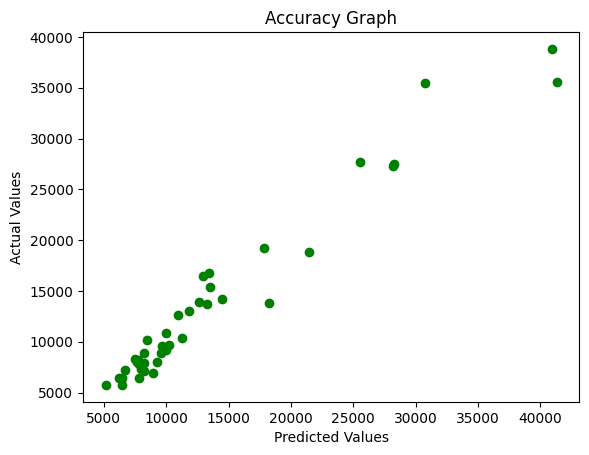

In [16]:
plt.scatter(test_y,pred_y,color="green")
plt.title("Accuracy Graph")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()